In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
# from datetime import datetime, timedelta
import helper

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [44]:
from sklearn.metrics import mean_squared_error

In [5]:
zri = pd.read_csv('target.csv', index_col = 0,
                   parse_dates=['Time']
                  )


In [6]:
zri

,zip_code,City,State,Time,zori_ssa,zori_ssa_diff
0,77494,Houston,TX,2014-01-01,1390.0,NaN
1,77449,Houston,TX,2014-01-01,1202.0,NaN
2,77084,Houston,TX,2014-01-01,1058.0,NaN
3,79936,El Paso,TX,2014-01-01,887.0,NaN
4,78130,San Antonio,TX,2014-01-01,1118.0,NaN
...,...,...,...,...,...,...
19560,76118,Dallas-Fort Worth,TX,2021-07-01,1737.0,197.0
19561,76247,Dallas-Fort Worth,TX,2021-07-01,1937.0,146.0
19562,78756,Austin,TX,2021-07-01,1547.0,-28.0
19563,78721,Austin,TX,2021-07-01,1807.0,345.0


In [ ]:
zri

In [9]:
zri_test = zri.merge(zri, how = 'left', on = ['zip_code','Time'],
                          copy = True)

In [10]:
zri_test

,zip_code,City_x,State_x,Time,zori_ssa_x,zori_ssa_diff_x,City_y,State_y,zori_ssa_y,zori_ssa_diff_y
0,77494,Houston,TX,2014-01-01,1390.0,NaN,Houston,TX,1390.0,NaN
1,77449,Houston,TX,2014-01-01,1202.0,NaN,Houston,TX,1202.0,NaN
2,77084,Houston,TX,2014-01-01,1058.0,NaN,Houston,TX,1058.0,NaN
3,79936,El Paso,TX,2014-01-01,887.0,NaN,El Paso,TX,887.0,NaN
4,78130,San Antonio,TX,2014-01-01,1118.0,NaN,San Antonio,TX,1118.0,NaN
...,...,...,...,...,...,...,...,...,...,...
19560,76118,Dallas-Fort Worth,TX,2021-07-01,1737.0,197.0,Dallas-Fort Worth,TX,1737.0,197.0
19561,76247,Dallas-Fort Worth,TX,2021-07-01,1937.0,146.0,Dallas-Fort Worth,TX,1937.0,146.0
19562,78756,Austin,TX,2021-07-01,1547.0,-28.0,Austin,TX,1547.0,-28.0
19563,78721,Austin,TX,2021-07-01,1807.0,345.0,Austin,TX,1807.0,345.0


In [3]:
test_lag_zri = helper.time_lag_merge(zri, zri,{1:['zori_ssa'],6:['zori_ssa']})

In [4]:
test_lag_zri

,zip_code,City,State,Time,zori_ssa,zori_ssa_diff,zori_ssa_1_month_shift,zori_ssa_6_month_shift
0,77494,Houston,TX,2014-01-01,1390.0,NaN,NaN,NaN
1,77449,Houston,TX,2014-01-01,1202.0,NaN,NaN,NaN
2,77084,Houston,TX,2014-01-01,1058.0,NaN,NaN,NaN
3,79936,El Paso,TX,2014-01-01,887.0,NaN,NaN,NaN
4,78130,San Antonio,TX,2014-01-01,1118.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
19560,76118,Dallas-Fort Worth,TX,2021-07-01,1737.0,197.0,1729.0,1692.0
19561,76247,Dallas-Fort Worth,TX,2021-07-01,1937.0,146.0,1915.0,1809.0
19562,78756,Austin,TX,2021-07-01,1547.0,-28.0,1540.0,1506.0
19563,78721,Austin,TX,2021-07-01,1807.0,345.0,1791.0,1715.0


In [65]:
test_lag_zri[test_lag_zri['zip_code']==78252].tail(10)

,zip_code,City,State,Time,zori_ssa,zori_ssa_diff,zori_ssa_1_month_shift,zori_ssa_6_month_shift
17629,78252,San Antonio,TX,2020-10-01,1497.0,59.0,1490.0,1464.0
17844,78252,San Antonio,TX,2020-11-01,1506.0,54.0,1497.0,1468.0
18059,78252,San Antonio,TX,2020-12-01,1516.0,50.0,1506.0,1473.0
18274,78252,San Antonio,TX,2021-01-01,1525.0,46.0,1516.0,1477.0
18489,78252,San Antonio,TX,2021-02-01,1535.0,41.0,1525.0,1484.0
18704,78252,San Antonio,TX,2021-03-01,1545.0,37.0,1535.0,1490.0
18919,78252,San Antonio,TX,2021-04-01,1555.0,33.0,1545.0,1497.0
19134,78252,San Antonio,TX,2021-05-01,1565.0,28.0,1555.0,1506.0
19349,78252,San Antonio,TX,2021-06-01,1575.0,23.0,1565.0,1516.0
19564,78252,San Antonio,TX,2021-07-01,1585.0,18.0,1575.0,1525.0


In [25]:
zri.loc[:,'delta_1'] = zri.loc[:,'zori_ssa'] - zri.loc[:,'zori_ssa_shift_one_month']

In [26]:
zri.loc[:,'delta_2'] = zri.loc[:,'zori_ssa_shift_one_month'] - zri.loc[:,'zori_ssa_shift_one_year']

In [28]:
train = zri[zri['City']!='Houston'].reset_index(drop=True)
test = zri[zri['City']=='Houston'].reset_index(drop=True)

In [29]:
X_train = train['delta_2']
y_train = train['delta_1']

X_test = test['delta_2']
y_test = test['delta_1']

In [30]:
lm = LinearRegression()

In [31]:
lm.fit(X_train.values.reshape(-1, 1),y_train)

LinearRegression()

In [32]:
lm.score(X_train.values.reshape(-1, 1),y_train)

0.7714230780458142

In [33]:
lm.score(X_test.values.reshape(-1, 1),y_test)

0.7987935465048244

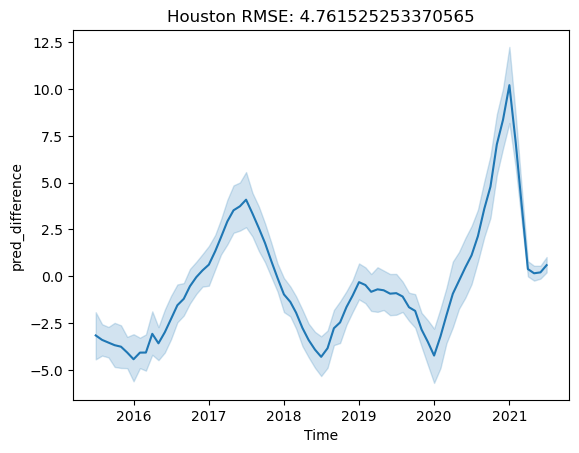

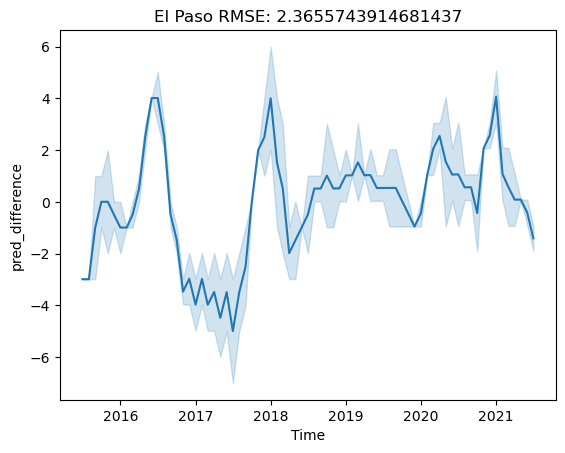

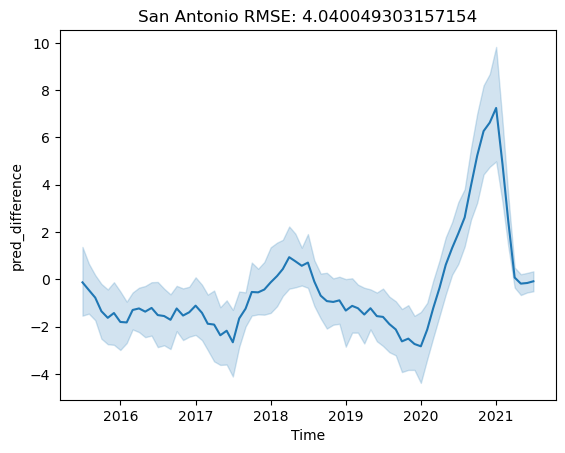

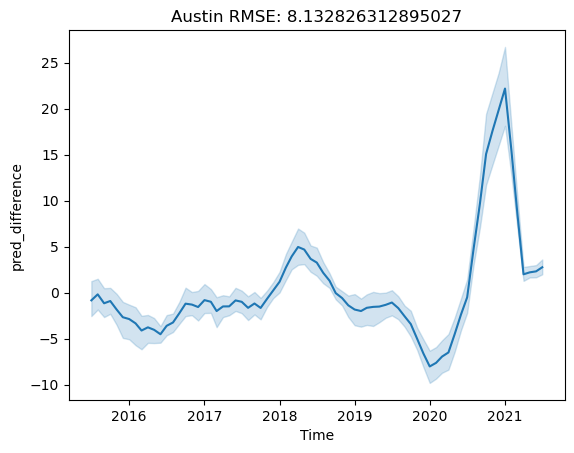

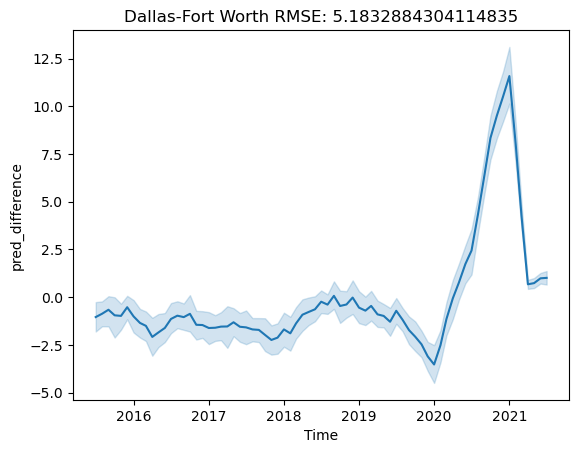

In [35]:
# julies_graph
metros = list(zri.City.unique())
for metro in metros:
    train = zri[zri['City']!=metro].reset_index(drop=True)
    test = zri[zri['City']==metro].reset_index(drop=True)

    X_train = train['delta_2']
    y_train = train['delta_1']

    X_test = test['delta_2']
    y_test = test['delta_1']

    lm = LinearRegression()
    lm.fit(X_train.values.reshape(-1, 1),y_train)
    y_predicted = lm.predict(X_test.values.reshape(-1, 1))
    test.loc[:,'pred_difference'] = test.loc[:,'delta_1'] - y_predicted

    y_predicted = lm.predict(X_test.values.reshape(-1, 1))
    rms = mean_squared_error(y_test, y_predicted, squared=False)

    g = sns.lineplot(data = test, x = 'Time',y = 'pred_difference')
    plt.title(f'{metro} RMSE: {rms}')
    plt.show()

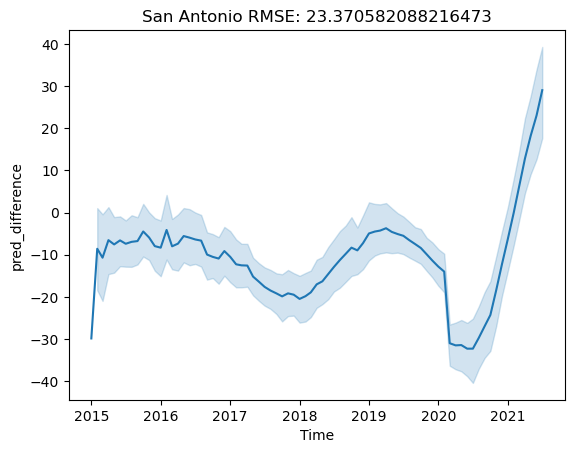

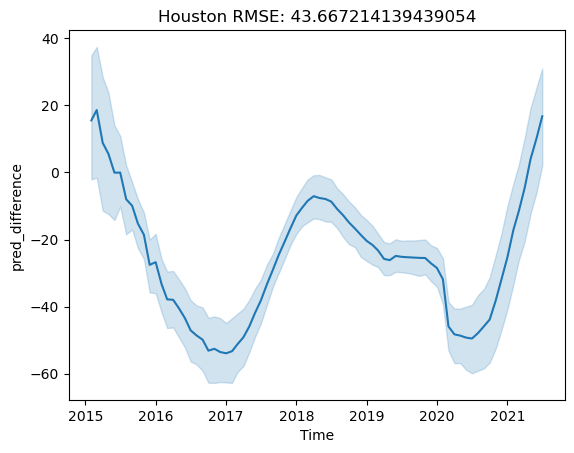

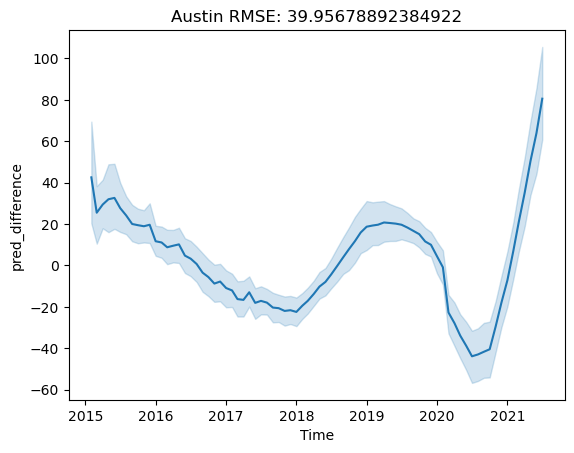

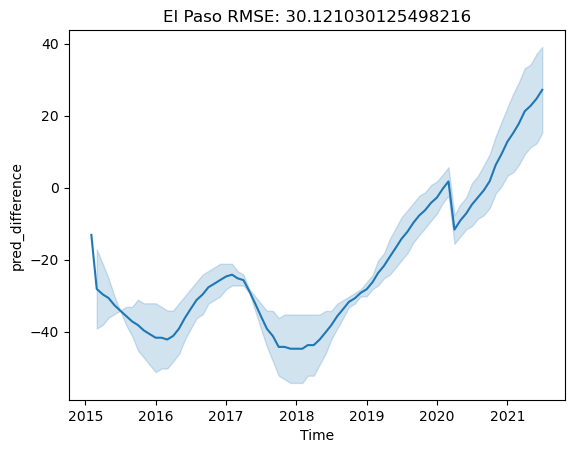

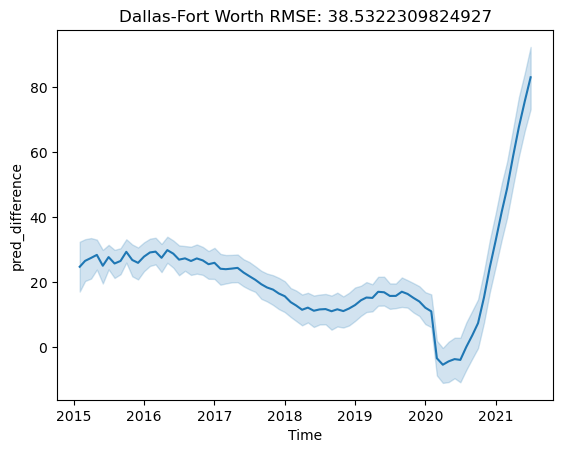

In [27]:
# julies_graph
metros = list(zri.City.unique())
for metro in metros:
    train = zri[zri['City']!=metro].reset_index(drop=True)
    test = zri[zri['City']==metro].reset_index(drop=True)

    X_train = train[['zori_ssa_shift_one_month','fatalities']]
    y_train = train['zori_ssa']

    X_test = test[['zori_ssa_shift_one_month','fatalities']]
    y_test = test['zori_ssa']

    lm = LinearRegression()
    lm.fit(X_train,y_train)
    y_predicted = lm.predict(X_test)
    test.loc[:,'pred_difference'] = test.loc[:,'zori_ssa'] - y_predicted

    y_predicted = lm.predict(X_test)
    rms = mean_squared_error(y_test, y_predicted, squared=False)

    g = sns.lineplot(data = test, x = 'Time',y = 'pred_difference')
    plt.title(f'{metro} RMSE: {rms}')
    plt.show()

In [25]:
lm.coef_

array([ 0.99834837, 13.52497128])

#### difference model